# Curva de fase del modulador


**Autor**: Luis Miguel Sánchez Brea.

**Fecha**: 01/07/2019.

**Objetivo**: Puesta a punto de SLM.

**Descripción**: Se pretende determinar la función niveles-gris - fase impresa

* Se ubica la cámara en el plano focal de una lente binaria
* Se envía la imagen de una lente binaria con niveles 0-ng
* Se determina la intensidad en el foco
* Se toma la curva y se guarda en un archivo calibracion.txt para llamar desde config.py

In [16]:
%run config_jupyter.ipynb

ERROR:root:File `u'config_jupyter.ipynb.py'` not found.


In [17]:
import time
from pprint import pprint
import cv2
import screeninfo

In [8]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_XY import Scalar_mask_XY

In [2]:
from py_slm.smc100 import SMC100
import py_slm.camera.tisgrabber as IC
from py_slm.py_slm import SLM
from py_slm.config import CONF_HOLOEYE2500, CONF_PACKARD_BELL, CONF_IMAGING_SOURCE


In [3]:
s=1.

### Cargar motor

In [4]:
smc100 = SMC100(1, 'COM3', silent=True)

Connecting to SMC100 on COM3


SerialException: could not open port 'COM3': WindowsError(5, 'Acceso denegado.')

In [ ]:
smc100.set_velocity(20*mm/s, check=True)

In [ ]:
smc100.home()

In [ ]:
smc100.move_absolute(-123.6*mm)
smc100.get_position(verbose=True)

### Cargar modulador

In [5]:
import screeninfo
screeninfo.get_monitors()

[monitor(1440x900+0+0), monitor(1024x768+1440+0)]

In [6]:
slm=SLM(config_SLM=CONF_HOLOEYE2500, config_Camera=CONF_IMAGING_SOURCE)

x0=slm.x0
y0=slm.y0
wavelength=slm.wavelength
print(x0.shape, y0.shape)

((1024L,), (768L,))


### Definir imagen

(<Figure size 360x324 with 1 Axes>,
 <matplotlib.image.AxesImage at 0xd42c9b0>)

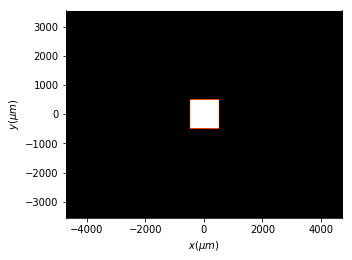

In [11]:
t = Scalar_mask_XY(slm.x0, slm.y0, slm.wavelength)
t.square(r0=(0,0), size=(1*mm, 1*mm), angle=0*degrees)
t.draw(kind='intensity')

### Cargar lente en modulador

In [12]:
"Creamos la imagen a partir de la máscara creada."
slm.mask_to_rawImage(mask_XY=t, kind='phase', normalize=True);

In [14]:
"Enviamos la imagen al SLM."
slm.send_image_screen()
cv2.waitKey(500)

NameError: name 'cv2' is not defined